In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy
import vdmlab as vdm

In [ ]:
def test_filter(spikes, edges, gaussian_std):
    dt = np.median(np.diff(edges))

    if gaussian_std is not None:
        n_points = 3 * gaussian_std * 2 / dt
        if n_points > len(edges):
            raise ValueError("gaussian_std is too large for these times")
        if n_points < 2:
            print('No gaussian filter applied. Check that gaussian_std > dt if filter desired.')
        gaussian_filter = signal.gaussian(n_points, gaussian_std/dt)
        gaussian_filter /= np.sum(gaussian_filter)

    counts = np.zeros((len(spikes), len(edges)-1))
    for idx, spiketrain in enumerate(spikes):
        counts[idx] = np.histogram(spiketrain.time, bins=edges)[0]
        if gaussian_std is not None and gaussian_std > dt:
            counts[idx] = np.convolve(counts[idx], gaussian_filter, mode='same')
    return counts

In [ ]:
mwin = 1.
mstd = 0.002
mdt = 0.025
mwindow = mwin / mdt 
if mwindow % 2 == 0:
    mwindow += 1
print(mwindow)
mfilter = scipy.signal.gaussian(mwindow, mstd/mdt)
print(mfilter)

In [ ]:
plt.plot(mfilter)
plt.show()

In [90]:
window = 1.
dt = 0.025
std = 0.005

n_points = 10 * std * 2 / dt
# n_points = max(n_points, 1.)
# n_points = window / dt
# if n_points % 2 == 0:
#     n_points += 1
print(n_points)
gaussian_filter = scipy.signal.gaussian(n_points, std/dt)
gaussian_filter /= np.sum(gaussian_filter)
print(gaussian_filter)

4.0
[  6.94397193e-12   5.00000000e-01   5.00000000e-01   6.94397193e-12]


In [86]:
n_points

4.0

In [87]:
dt

0.025

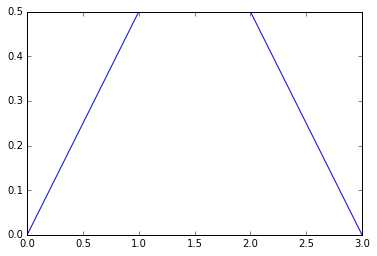

In [88]:
plt.plot(gaussian_filter)
plt.show()

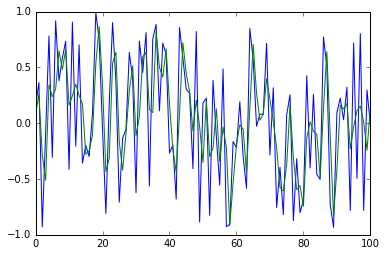

In [89]:
signal = np.random.uniform(-1, 1, size=101)
plt.plot(signal)
plt.plot(np.convolve(signal, gaussian_filter, 'same'))
plt.show()

In [43]:

def make_gauss(sigma, x, mu):
    this_filter = 1 / (np.sqrt(2 * (sigma)**2 * np.pi)) * np.exp(- (x - mu)**2 / (2 * sigma **2))
    return this_filter


In [45]:
print(gaussian)

1.99471140201


In [53]:
sigma = 0.005
x = np.arange(-0.5, 0.5, 0.025)
mu = 0
gaussian = make_gauss(sigma, x, mu)

In [54]:
x

array([ -5.00000000e-01,  -4.75000000e-01,  -4.50000000e-01,
        -4.25000000e-01,  -4.00000000e-01,  -3.75000000e-01,
        -3.50000000e-01,  -3.25000000e-01,  -3.00000000e-01,
        -2.75000000e-01,  -2.50000000e-01,  -2.25000000e-01,
        -2.00000000e-01,  -1.75000000e-01,  -1.50000000e-01,
        -1.25000000e-01,  -1.00000000e-01,  -7.50000000e-02,
        -5.00000000e-02,  -2.50000000e-02,   4.44089210e-16,
         2.50000000e-02,   5.00000000e-02,   7.50000000e-02,
         1.00000000e-01,   1.25000000e-01,   1.50000000e-01,
         1.75000000e-01,   2.00000000e-01,   2.25000000e-01,
         2.50000000e-01,   2.75000000e-01,   3.00000000e-01,
         3.25000000e-01,   3.50000000e-01,   3.75000000e-01,
         4.00000000e-01,   4.25000000e-01,   4.50000000e-01,
         4.75000000e-01])

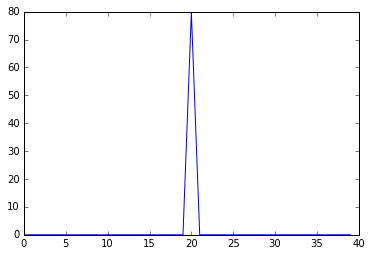

In [55]:
plt.plot(gaussian)
plt.show()